In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
print("Number of Observations in adult dataset:", df.shape)
df.head()

Number of Observations in adult dataset: (32560, 15)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

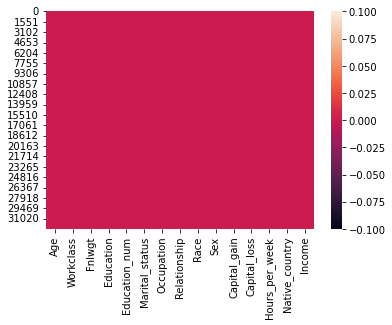

In [6]:
sns.heatmap(df.isna())

There is no null values in the dataset

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

These are the number of unique values present in each columns. Income holds only 2 values.

In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print('-----------------------------------')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
-----------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-----------------------------------
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
-----------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate  

In [9]:
df.isin([" ?"]).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

we can see workclass, occupation, native_country holds"?" value.
so we would drop the respective rows for the dataset.
Capital_gain,Capital_loss has more 0s. these columns are not required for our analysis. so we will drop them

In [10]:
df.drop("Capital_gain", axis=1, inplace=True)
df.drop("Capital_loss", axis=1, inplace=True)
df.drop("Fnlwgt",axis=1,inplace=True)

In [11]:
df.replace(to_replace=" ?", value=np.nan, inplace=True)
df=df.dropna()
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [12]:
df.isin([" ?"]).sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
df.shape

(30161, 12)

In [14]:
subset=df.sample(frac=0.15)
df=subset
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
10738,33,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Male,48,United-States,<=50K
341,36,State-gov,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
14223,25,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,35,United-States,<=50K
32444,61,Private,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,50,United-States,<=50K
8596,32,Federal-gov,Assoc-acdm,12,Divorced,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
10314,24,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
29478,33,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,60,United-States,<=50K
18248,29,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,40,United-States,<=50K
24364,31,Local-gov,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,45,United-States,<=50K


# Exploratory Data Analysis

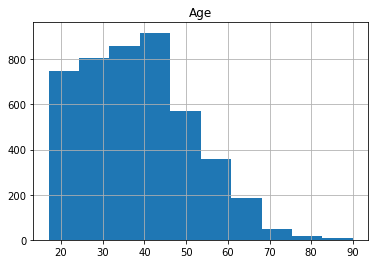

In [15]:
df["Age"].hist(grid=True)
plt.title("Age")
plt.show()

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

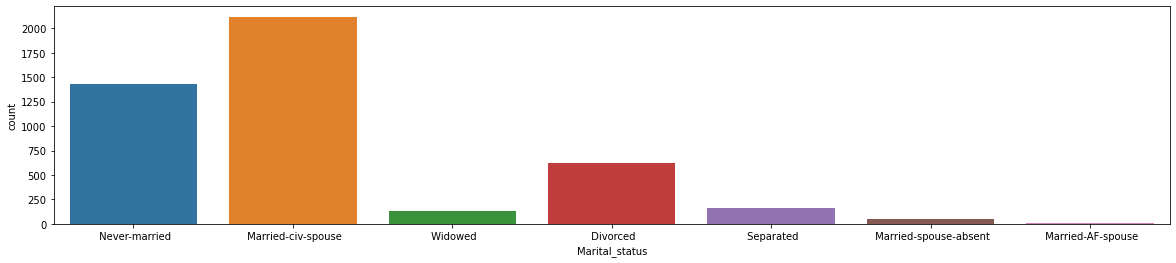

In [16]:
plt.figure(figsize=(20,4))
sns.countplot(df.Marital_status)

<AxesSubplot:xlabel='Sex', ylabel='count'>

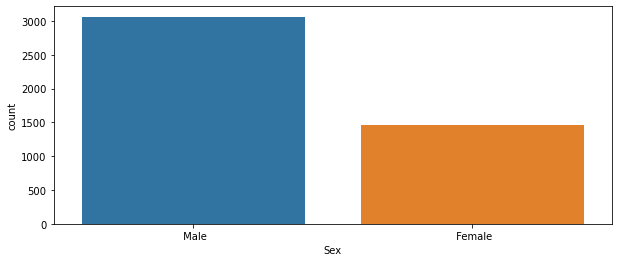

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(df.Sex)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

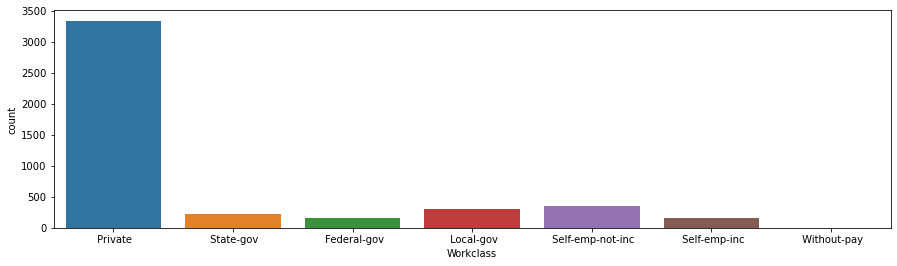

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(df['Workclass'])

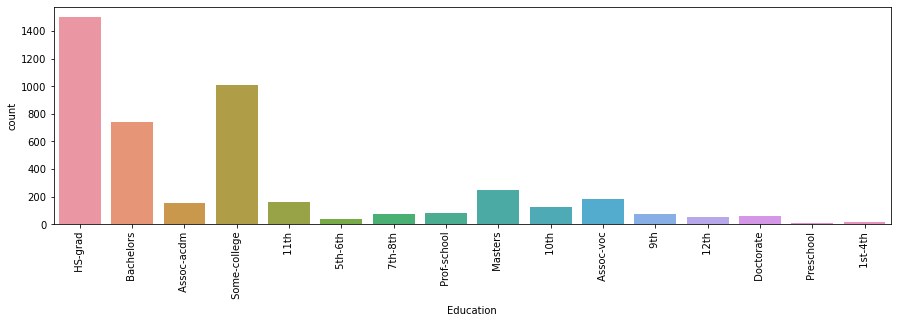

In [19]:
#count plot for Education
plt.figure(figsize=(15,4))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

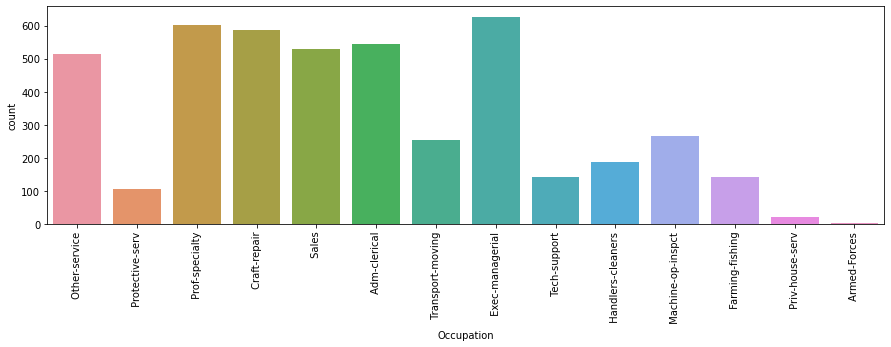

In [20]:
plt.figure(figsize=(15,4))
sns.countplot(df["Occupation"])
plt.xticks(rotation=90)
plt.show()

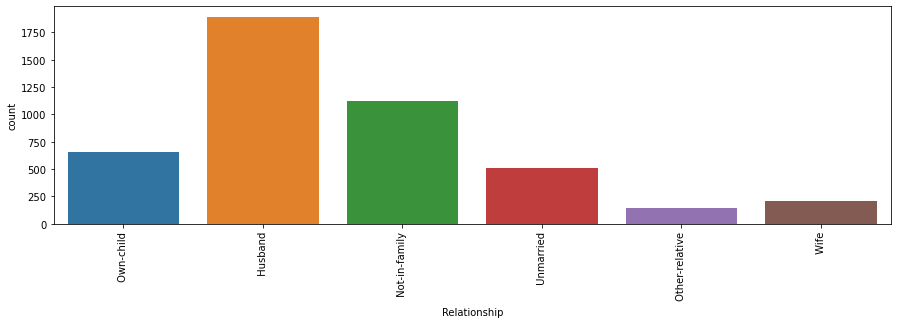

In [21]:
plt.figure(figsize=(15,4))
sns.countplot(df["Relationship"])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Race', ylabel='count'>

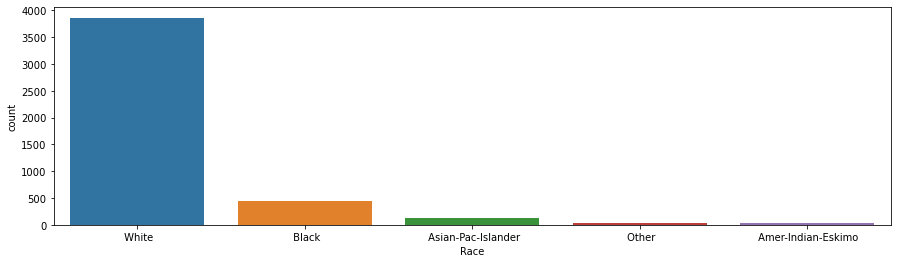

In [22]:
plt.figure(figsize=(15,4))
sns.countplot(df.Race)

<AxesSubplot:xlabel='Income', ylabel='count'>

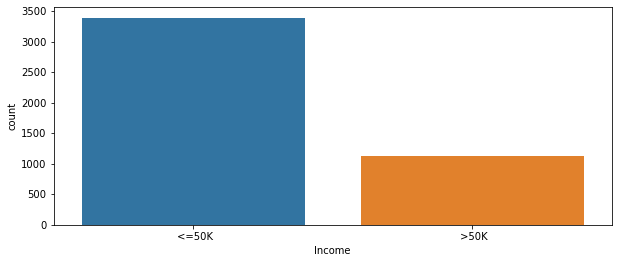

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(df.Income)

From the above figures, we can say
There are more people from 25-45 age group.
Most of the people have income <=50k.
Most of the people working in private sector which i high compared to others.
The count of HS- grad is high followed by some college and the count of doctorate.
Married people have high counts followed by the singles or never married people.
In Relationship Husband has more values.
The count of white is more in the dataset.

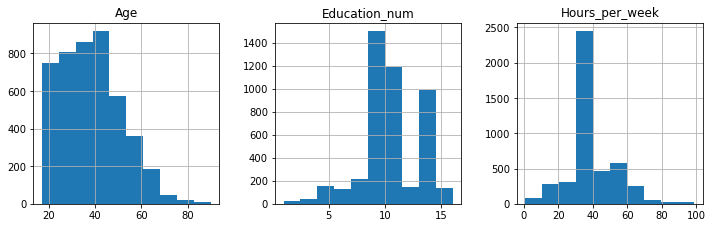

In [24]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

We can see there are more people from 25-45 age group.
Mostly people having education for 9-11 followed by 13 years.
Mostly people work 40 hours per week.

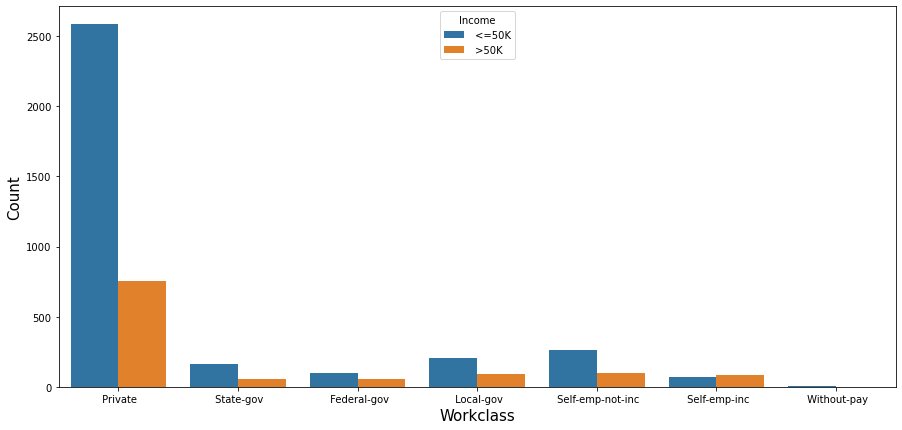

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(df['Workclass'],hue='Income', data=df)
plt.xlabel('Workclass', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

We have maximum no of population working in private sector whose income is <=50K.

At same time people working private sector are more as compared to other sectors, whose income is >=50K

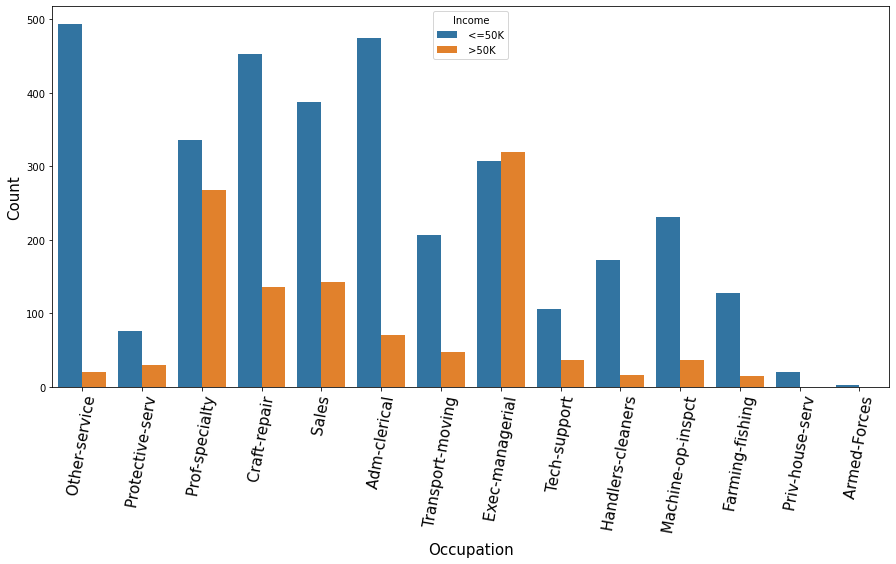

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(df['Occupation'],hue='Income',data=df)
plt.xlabel('Occupation', fontsize=15)
plt.ylabel('Count', fontsize=15)
locs, labels=plt.xticks(fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

Occupation like Exce-Managerial and prof-specialty having higher population with income>=50k. It indicates occupation has good impact on income.

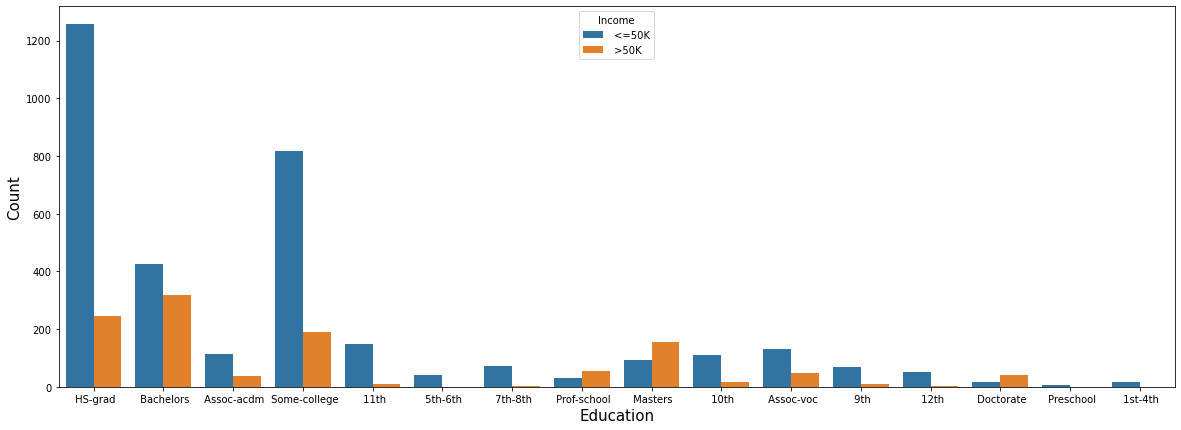

In [27]:
plt.figure(figsize=(20,7))
sns.countplot(df['Education'],hue='Income', data=df)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Graph indicates that people with higher degree have more chance to have income>=50k

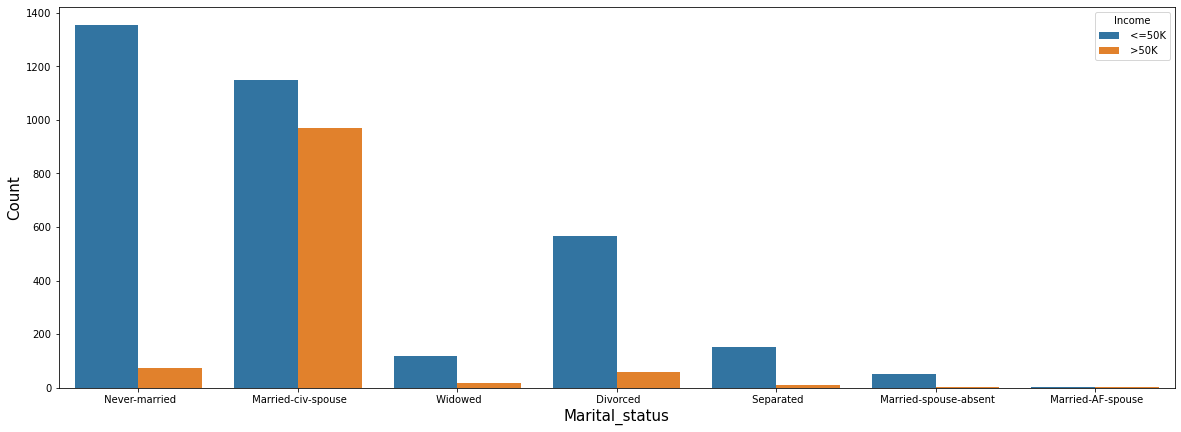

In [28]:
plt.figure(figsize=(20,7))
sns.countplot(df['Marital_status'], hue='Income', data=df)
plt.xlabel('Marital_status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Married civ  population is having higher number of income which is >=50k, as compared to other columns

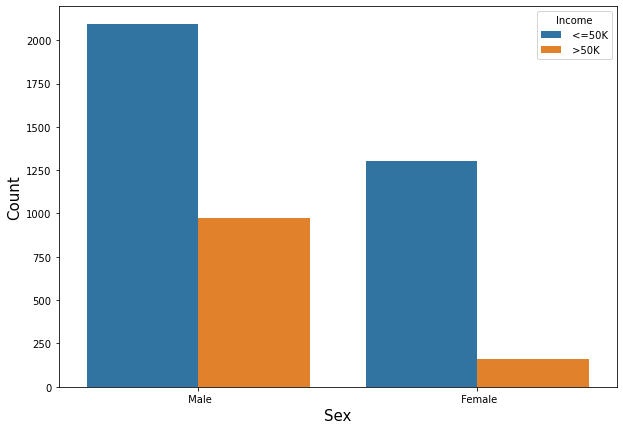

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(df['Sex'],hue='Income', data=df)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

We can see Male is having higher count as compared to Female, for income >=50k

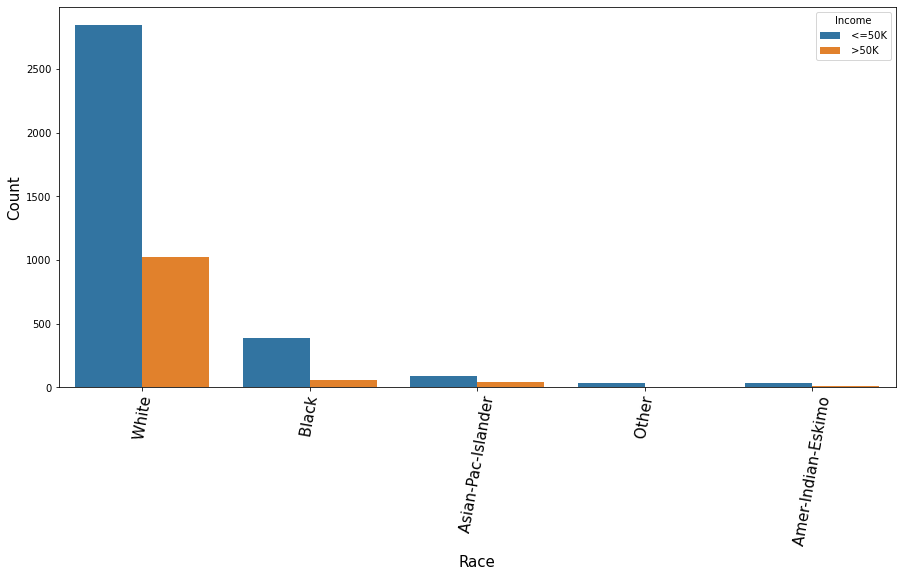

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(df['Race'],hue='Income', data=df)
plt.xlabel('Race', fontsize=15)
plt.ylabel('Count', fontsize=15)
locs, labels=plt.xticks(fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

As majority of population is white, the chance of getting income>=50k, is higher for white

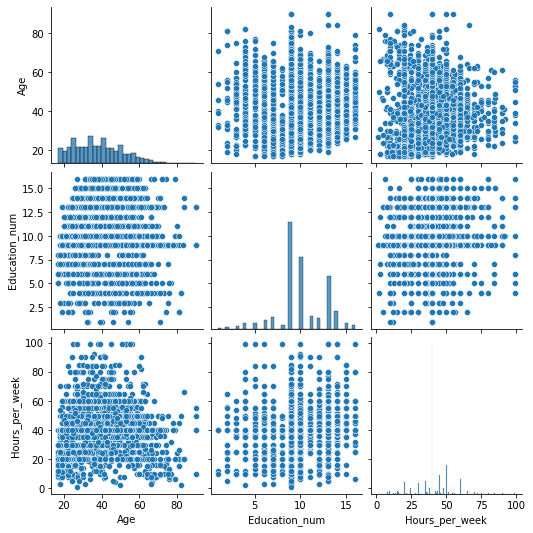

In [31]:
sns.pairplot(df)

# Checking Outliers

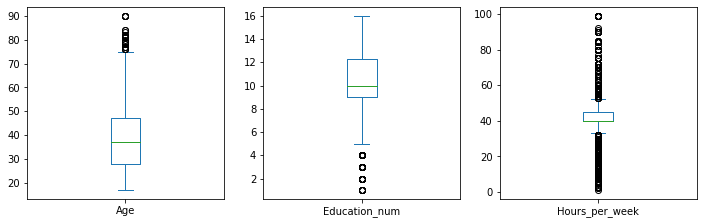

In [32]:
df.plot(kind='box',figsize=(12,12),layout=(3,3), sharex=False,subplots=True);

# Removing Outliers

In [33]:
features=df[["Age","Education_num","Hours_per_week"]]
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,Age,Education_num,Hours_per_week
10738,0.411631,0.444254,0.594267
341,0.182124,0.444254,0.072308
14223,1.023650,1.138894,0.488918
32444,1.730434,0.444254,0.760911
8596,0.488134,0.743107,0.072308
...,...,...,...
10314,1.100152,1.138894,0.072308
29478,0.411631,0.444254,1.594130
18248,0.717641,0.444254,0.072308
24364,0.564636,0.048467,0.344301


In [34]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
10738,33,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Male,48,United-States,<=50K
341,36,State-gov,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
14223,25,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,35,United-States,<=50K
32444,61,Private,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,50,United-States,<=50K
8596,32,Federal-gov,Assoc-acdm,12,Divorced,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
10314,24,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
29478,33,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,60,United-States,<=50K
18248,29,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,40,United-States,<=50K
24364,31,Local-gov,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,45,United-States,<=50K


In [35]:
df.shape

(4524, 12)

In [36]:
df_new.shape

(4422, 12)

In [37]:
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

2.2546419098143233

In [38]:
df_new

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
10738,33,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Male,48,United-States,<=50K
341,36,State-gov,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
14223,25,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,35,United-States,<=50K
32444,61,Private,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,50,United-States,<=50K
8596,32,Federal-gov,Assoc-acdm,12,Divorced,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
10314,24,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
29478,33,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,60,United-States,<=50K
18248,29,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,40,United-States,<=50K
24364,31,Local-gov,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,45,United-States,<=50K


# Label Encoder

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Education']=le.fit_transform(df_new['Education'])
df_new['Workclass']=le.fit_transform(df_new['Workclass'])
df_new['Marital_status']=le.fit_transform(df_new['Marital_status'])
df_new['Occupation']=le.fit_transform(df_new['Occupation'])
df_new['Relationship']=le.fit_transform(df_new['Relationship'])
df_new['Race']=le.fit_transform(df_new['Race'])
df_new['Sex']=le.fit_transform(df_new['Sex'])
df_new['Native_country']=le.fit_transform(df_new['Native_country'])
df_new['Income']=le.fit_transform(df_new['Income'])


In [40]:
df_new

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
10738,33,2,10,9,4,7,3,4,1,48,35,0
341,36,5,10,9,2,10,0,4,1,40,35,1
14223,25,2,8,13,4,9,3,4,0,35,35,0
32444,61,2,10,9,6,2,1,2,0,50,35,0
8596,32,0,6,12,0,10,1,4,1,40,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10314,24,2,8,13,4,0,1,4,1,40,35,0
29478,33,4,10,9,2,11,0,4,1,60,35,0
18248,29,2,10,9,0,6,4,4,1,40,35,0
24364,31,1,13,10,2,10,0,4,1,45,35,0


In [41]:
df_new.describe()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
count,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000
mean,38.146766,2.200814,9.234735,10.164405,2.587291,5.996382,1.428539,3.671416,0.675486,40.470149,33.563546,0.251922
std,12.744614,0.975807,3.319670,2.445954,1.507263,4.053865,1.611632,0.835695,0.468246,10.770472,5.481511,0.434166
min,17.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,28.000000,2.000000,8.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,40.000000,35.000000,0.000000
50%,37.000000,2.000000,10.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,40.000000,35.000000,0.000000
75%,47.000000,2.000000,11.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,45.000000,35.000000,1.000000
max,77.000000,6.000000,13.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,75.000000,37.000000,1.000000


# Skewness

In [42]:
df_new.skew()

Age               0.406235
Workclass         1.188536
Education        -1.126189
Education_num    -0.117590
Marital_status    0.005245
Occupation        0.104059
Relationship      0.795786
Race             -2.442150
Sex              -0.749886
Hours_per_week   -0.327564
Native_country   -4.186574
Income            1.143296
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

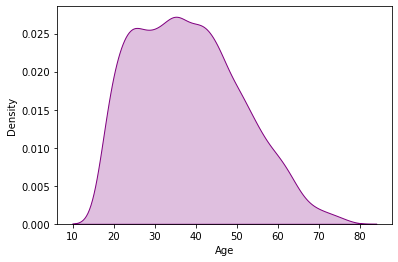

In [43]:
sns.distplot(df_new["Age"],color="purple",kde_kws={"shade":True},hist=False)

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

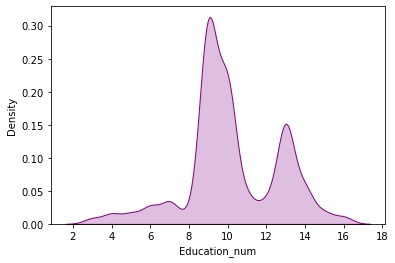

In [44]:
sns.distplot(df_new["Education_num"],color="purple",kde_kws={"shade":True},hist=False)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

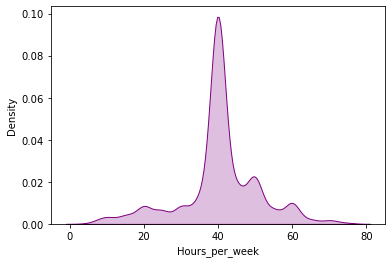

In [45]:
sns.distplot(df_new["Hours_per_week"],color="purple",kde_kws={"shade":True},hist=False)

From the above we can see that there is no skewness

# Correlation 

In [46]:
df_new.corr()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.058524,0.002762,0.063072,-0.287761,-0.011114,-0.245250,0.017930,0.069955,0.122857,-0.016389,0.259232
Workclass,0.058524,1.000000,0.025037,0.045964,0.008687,0.021683,-0.042220,0.045984,0.039687,0.030055,0.012330,0.011902
Education,0.002762,0.025037,1.000000,0.343683,-0.050613,-0.049218,-0.006461,0.013214,-0.031017,0.069165,0.087883,0.058617
Education_num,0.063072,0.045964,0.343683,1.000000,-0.049510,0.088684,-0.112038,0.024442,0.030201,0.171432,0.060824,0.337357
Marital_status,-0.287761,0.008687,-0.050613,-0.049510,1.000000,0.053692,0.188289,-0.079132,-0.116735,-0.198787,-0.037877,-0.186043
Occupation,-0.011114,0.021683,-0.049218,0.088684,0.053692,1.000000,-0.048994,-0.008096,0.070282,0.008918,-0.015075,0.026864
Relationship,-0.245250,-0.042220,-0.006461,-0.112038,0.188289,-0.048994,1.000000,-0.128365,-0.586898,-0.270927,0.015493,-0.261971
Race,0.017930,0.045984,0.013214,0.024442,-0.079132,-0.008096,-0.128365,1.000000,0.104325,0.074213,0.130053,0.061121
Sex,0.069955,0.039687,-0.031017,0.030201,-0.116735,0.070282,-0.586898,0.104325,1.000000,0.233254,-0.024879,0.225316
Hours_per_week,0.122857,0.030055,0.069165,0.171432,-0.198787,0.008918,-0.270927,0.074213,0.233254,1.000000,0.001074,0.252124


In [47]:
# correlation matrix using heatmap

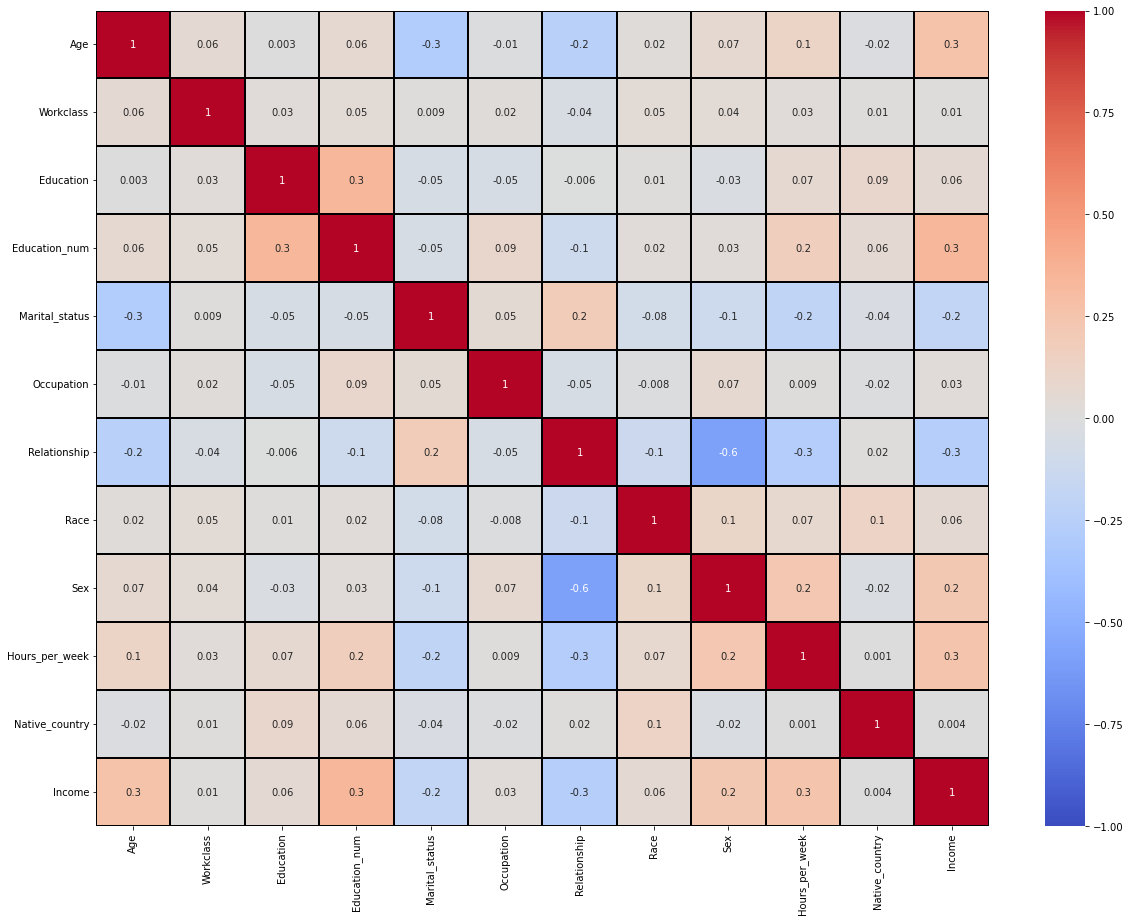

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1,vmax=1,fmt='.1g',annot=True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

There is no multicolinearity. Workclass, Native_country, occupation, Race and Education has less correlation with target.

Columns Education_num, Age, sex and Hours_per_week have positive correlation with the target.

# Splitting of Data 

In [49]:
x=df_new.drop("Income", axis=1)
y=df_new["Income"]

# Finding Best Random State

In [50]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
    print("Best Accuracy is", maxAccu,"on Random_State", maxRs)

Best Accuracy is 0.7887005649717514 on Random_State 1
Best Accuracy is 0.8192090395480226 on Random_State 2
Best Accuracy is 0.8192090395480226 on Random_State 2
Best Accuracy is 0.8192090395480226 on Random_State 2
Best Accuracy is 0.8192090395480226 on Random_State 2
Best Accuracy is 0.8192090395480226 on Random_State 2
Best Accuracy is 0.8214689265536723 on Random_State 7
Best Accuracy is 0.8214689265536723 on Random_State 7
Best Accuracy is 0.8214689265536723 on Random_State 7
Best Accuracy is 0.8214689265536723 on Random_State 7
Best Accuracy is 0.8214689265536723 on Random_State 7
Best Accuracy is 0.8214689265536723 on Random_State 7
Best Accuracy is 0.8214689265536723 on Random_State 7
Best Accuracy is 0.8214689265536723 on Random_State 7
Best Accuracy is 0.8214689265536723 on Random_State 7
Best Accuracy is 0.8214689265536723 on Random_State 7
Best Accuracy is 0.8248587570621468 on Random_State 17
Best Accuracy is 0.8248587570621468 on Random_State 17
Best Accuracy is 0.8248587

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20, random_state=10)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [53]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of', m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:", crossval)
    print("Difference between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression()
0.7943502824858757
[[610  44]
 [138  93]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       654
           1       0.68      0.40      0.51       231

    accuracy                           0.79       885
   macro avg       0.75      0.67      0.69       885
weighted avg       0.78      0.79      0.77       885

Cross Validation Score: 0.7991839865020323
Difference between Accuracy Score and CrossValidation Score: 0.00483370401615657


Accuracy score: of SVC()
0.7796610169491526
[[637  17]
 [178  53]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       654
           1       0.76      0.23      0.35       231

    accuracy                           0.78       885
   macro avg       0.77      0.60      0.61       885
weighted avg       0.78      0.78      0.73       885

Cross Validation Score: 0.7919495360073625
Difference between Accuracy 

We can see Random Forest Classifier is performing better than other models.

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':[4,5,6,7,8],
           'max_features':['sqrt','auto','log2'],
           'n_estimators':[200,500],
           'criterion':['gini','entropy'] }
rfc=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3)
rfc.fit(x_train,y_train)



In [64]:
rf1=RandomForestClassifier(max_features='sqrt',max_depth=10, criterion='gini', n_estimators=102)
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print('Accuracy score: of',rf1)
acc=accuracy_score(y_test,predrf1)
print(acc)
print(confusion_matrix(y_test,predrf1))
print(classification_report(y_test,predrf1))

Accuracy score: of RandomForestClassifier(max_depth=10, n_estimators=102)
0.8372881355932204
[[615  39]
 [105 126]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       654
           1       0.76      0.55      0.64       231

    accuracy                           0.84       885
   macro avg       0.81      0.74      0.77       885
weighted avg       0.83      0.84      0.83       885



# ROC AUC

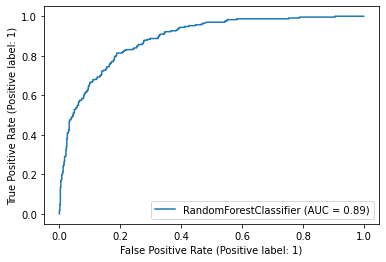

In [65]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(rf1,x_test,y_test)
plt.show()

 The score is good, we can save the model

# Saving the Model

In [66]:
import pickle
filename='Census_Income.pkl'
pickle.dump(rf1,open(filename,'wb'))

# Conclusion

In [67]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predrf1},index=range(len(a)))
df_com.sample(10)

,original,Predicted
380,0,0
693,0,0
225,1,1
550,0,0
823,0,0
554,0,0
598,1,0
702,0,0
488,0,0
393,0,0
